In [ ]:
!pip install opencv-contrib-python==4.10.0.84

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

Randomly selected bounding box for initial frames: (554, 133, 556, 424)
Frame 1: Tracking would likely succeed.
Frame 2: Tracking would likely succeed.
Frame 3: Tracking would likely succeed.
Frame 4: Tracking would likely succeed.
Frame 5: Tracking would likely succeed.
Frame 6: Tracking would likely succeed.
Frame 7: Tracking would likely succeed.
Frame 8: Tracking would likely succeed.
Frame 9: Tracking would likely succeed.
Frame 10: Tracking would likely succeed.


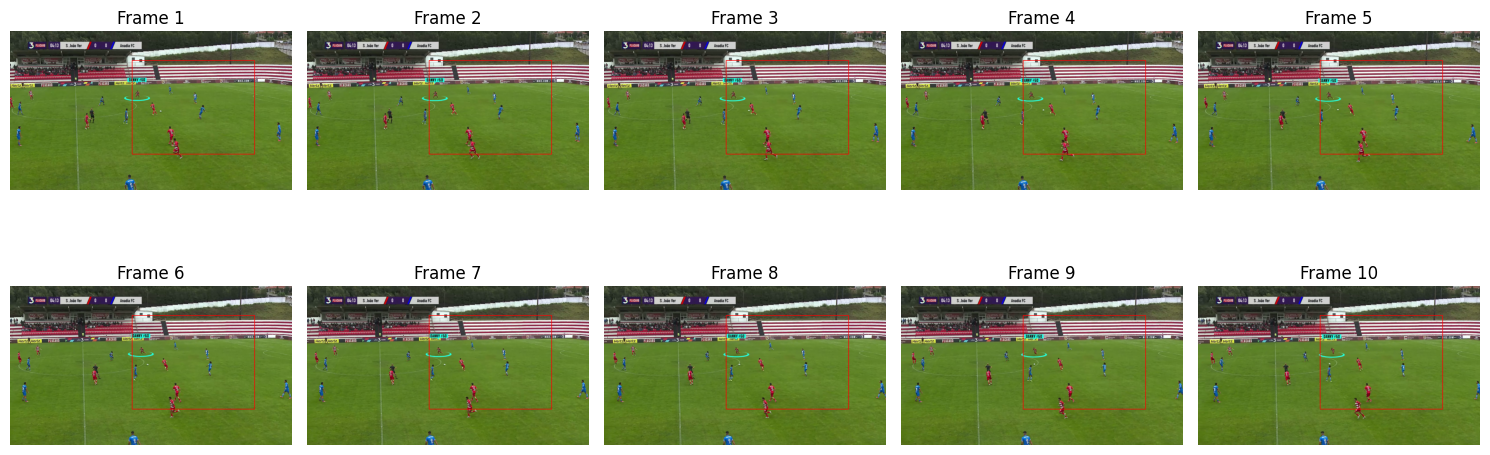

In [ ]:
import cv2
import random
import matplotlib.pyplot as plt

def display_annotated_initial_frames_with_tracker(video_path):
    """
    Loads a video, randomly selects a region in the first frame,
    initializes a CSRT tracker, draws the initial bounding box on the
    first 10 frames using Matplotlib, and prints whether tracking
    would succeed on these initial frames.

    Args:
        video_path (str): The path to the video file.
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    ret, first_frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
        cap.release()
        return

    height, width, _ = first_frame.shape
    x = random.randint(0, width // 2)
    y = random.randint(0, height // 2)
    w = random.randint(100, width - x - 10)
    h = random.randint(100, height - y - 10)
    initial_bbox = (x, y, w, h)
    print(f"Randomly selected bounding box for initial frames: {initial_bbox}")

    tracker = cv2.TrackerCSRT_create()
    tracker.init(first_frame, initial_bbox)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i in range(10):
        ret, frame = cap.read()
        if not ret:
            print(f"Warning: Could not read frame {i+1}.")
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_with_bbox = frame_rgb.copy()
        x_int, y_int, w_int, h_int = map(int, initial_bbox)
        cv2.rectangle(frame_with_bbox, (x_int, y_int), (x_int + w_int, y_int + h_int), (255, 0, 0), 2)

        success, updated_bbox = tracker.update(frame)
        if success:
            print(f"Frame {i + 1}: Tracking would likely succeed.")
        else:
            print(f"Frame {i + 1}: Tracking would likely fail.")

        axes[i].imshow(frame_with_bbox)
        axes[i].set_title(f"Frame {i + 1}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
    cap.release()

video_path = r'C:\Users\sahil\Downloads\hmi\clip_test.mp4'
display_annotated_initial_frames_with_tracker(video_path)